# 1. Perform Exploratory Data Analysis
---

- What can you conclude from methods of central tendency and deviation of the variables?
The data doesn't follow normal distrubution for the most part, aside from age

- Are there any correlated variables?
There is about a 30% correlation between auxillary nodes and survival, but not such a high correlation that it should be removed from the model

- Interpret the skewness of the variables
There is a disproportionate number of people in the first year of the dataset

The average age of the patients is around 50, and the vast majority have no auxillary nodes

In [53]:
# Load the data
import pandas as pd

data = pd.read_csv("cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [54]:
# Summary Statistics

data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:>

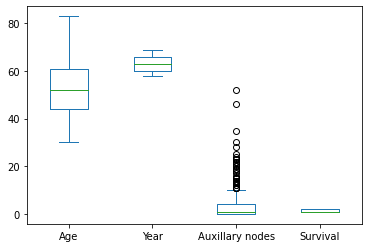

In [55]:
# Box plot

data.plot.box()

<AxesSubplot:>

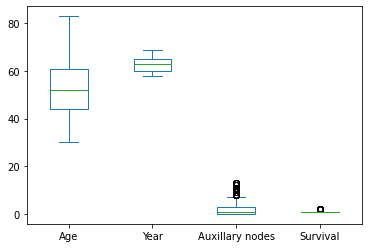

In [56]:
# Removing Outliers

# Max = 75% + 1.5* (75% - 25%)

maximum = 4 + 1.5*(6 - 0)

clean_data = data[data["Auxillary nodes"] <= maximum]

clean_data.plot.box()

#clean_data = data

In [57]:
# Correlation
corr = data.corr()
clean_corr = clean_data.corr()

clean_corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.079336,-0.108462,0.069329
Year,0.079336,1.000000,-0.046667,-0.014620
Auxillary nodes,-0.108462,-0.046667,1.000000,0.321588
Survival,0.069329,-0.014620,0.321588,1.000000


<AxesSubplot:>

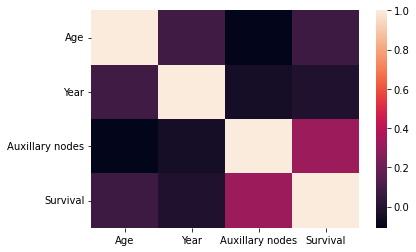

In [58]:
# Visualization - correlation

import seaborn as sns

sns.heatmap(clean_corr)

- Remove correlated variables
- Nothing to do

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival'}>]], dtype=object)

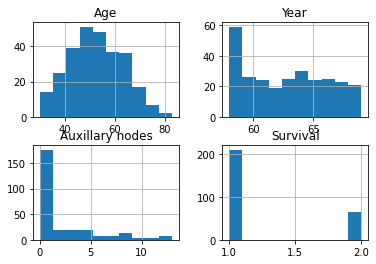

In [59]:
# Skewness
clean_data.hist()

- Removing Skewness

- Doesn't seem to be helpful in this case

In [60]:
'''
# Standardization and Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() # Normalize
scaler = StandardScaler() # Standardize
scaler.fit(clean_data)
scaled = scaler.fit_transform(clean_data)
scaled_data = pd.DataFrame(scaled, columns = clean_data.columns)

scaled_data.hist()
'''

'\n# Standardization and Normalization - Scikit-learn\n\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import MinMaxScaler\n\n#scaler = MinMaxScaler() # Normalize\nscaler = StandardScaler() # Standardize\nscaler.fit(clean_data)\nscaled = scaler.fit_transform(clean_data)\nscaled_data = pd.DataFrame(scaled, columns = clean_data.columns)\n\nscaled_data.hist()\n'

# Export the Data

In [61]:
clean_data.to_csv("final.csv")

# 2. Develop Supervised learning models
---

- Logistic Regression

- Random Forest

- Support Vector Machine

- Neural Network

Compare the 4 methods based on the performance metrics and identify the best model for this problem

The most useful model was probably the logistic regression, as it had no false positives for survival < 5 years. Aside from that, it also had the highest accuracy rating in initial testing. It did tie with the neural network in cross validation, but based on the false positive rate, i would consider it to be the better model.

- Use 10 - fold cross validation

- Use GridSearchCV for searching through hyperparameters



# Import additional libraries

Using SKLearn for ML and MatPlotLib for data visualization

In [62]:
# Import additional libraries

import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

For some reason the column name for "Survival" was "Survival ". Updated the column name manually in the CSV

,Age,Year,Auxillary nodes,Survival
0,-2.082770,-0.244617,0.272391,0
1,-2.082770,0.676033,-0.659590,0
2,-1.990544,-1.165268,-0.038270,0
3,-1.990544,0.676033,0.583051,0
4,-1.806092,-1.472151,2.447013,0
...,...,...,...,...
271,2.067399,-0.244617,-0.348930,0
272,2.159625,1.289800,-0.659590,0
273,2.251851,0.676033,0.272391,0
274,2.344077,0.676033,-0.348930,1


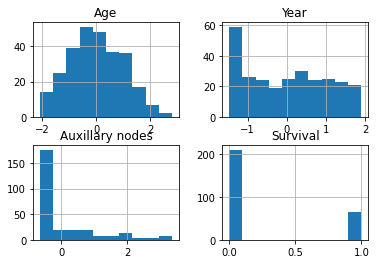

In [63]:
# Import data
data = pd.read_csv("final.csv")

#data = data.drop(columns = ["Year"])
#data = data.drop(columns = ["Age"])
#data = data.drop(columns = ["Auxillary nodes"])

# Pre Processing
# Standardization and Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Normalize
scaler = StandardScaler() # Standardize
scaler.fit(data.drop(columns = ["Survival"]))
scaled = scaler.fit_transform(data.drop(columns = ["Survival"]))
scaled_data = pd.DataFrame(scaled, columns = data.drop(columns = ["Survival"]).columns)
survival_data = data["Survival"]
scaled_data = scaled_data.join(survival_data)

data = scaled_data.dropna()
data["Survival"] = data["Survival"] -1
data = data.drop(columns=["Unnamed: 0"])

data.hist()

# Create features/inputs
X = data.drop(columns = ["Survival"])

# Create the output/class
y = data["Survival"]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data


# Logistic Regression

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        87
           1       1.00      0.21      0.34        24

    accuracy                           0.83       111
   macro avg       0.91      0.60      0.62       111
weighted avg       0.86      0.83      0.78       111



C:\Users\qthooloo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


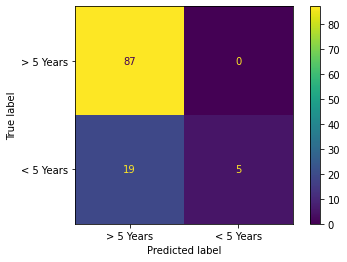

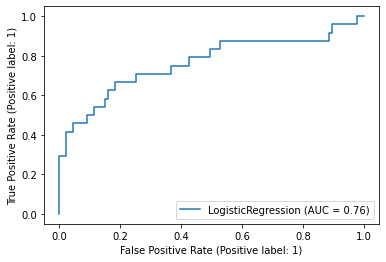

In [64]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "newton-cg", penalty = "none", random_state = 42).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["> 5 Years", "< 5 Years"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        87
           1       0.29      0.08      0.13        24

    accuracy                           0.76       111
   macro avg       0.54      0.51      0.49       111
weighted avg       0.68      0.76      0.70       111



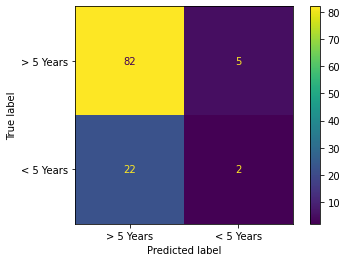

In [65]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 92, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        87
           1       0.50      0.12      0.20        24

    accuracy                           0.78       111
   macro avg       0.65      0.55      0.54       111
weighted avg       0.74      0.78      0.73       111



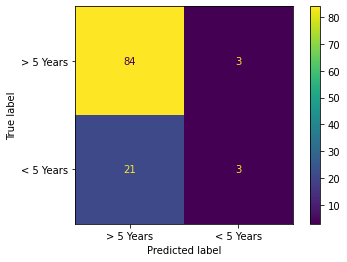

In [66]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 'scale', C=4).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

# Neural Network

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        87
           1       0.11      0.04      0.06        24

    accuracy                           0.72       111
   macro avg       0.44      0.47      0.45       111
weighted avg       0.63      0.72      0.67       111



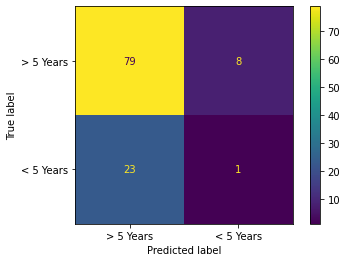

In [67]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'adam', max_iter=200, alpha = 0.0001, hidden_layer_sizes = (77,), random_state = 1, activation = "tanh", learning_rate_init = 1, learning_rate="constant").fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))#

# Calculate Best Hyperparameters

In [68]:
# Calculate best hyperparameters for clf

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty':('none', 'l1', 'l2', 'elasticnet'), 'C':(100, 10, 1, 0.1, 0.01)}

clf_grid = GridSearchCV(clf, parameters, n_jobs=23)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

C:\Users\qthooloo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\qthooloo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\qthooloo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\qthooloo\AppData\Local\Pr

{'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [69]:
# Calculate best hyperparameters for rf

parameters = {'n_estimators':range(90, 100, 1), 'max_depth':range(3, 7, 1), 'max_features':('sqrt', 'log2')}

rf_grid = GridSearchCV(rf, parameters, n_jobs=23)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 92}

In [70]:
# Calculate best hyperparameters for svm

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':range(1, 100, 1), 'gamma':('scale', 'auto')}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}

In [71]:
# Calculate best hyperparameters for nn

parameters = {'solver':('lbfgs', 'sgd', 'adam'),'learning_rate':('constant', 'invscaling', 'adaptive'),'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':range(1, 100), 'learning_rate_init':(1, 10, 100)}

nn_grid = GridSearchCV(nn, parameters, n_jobs=23)
nn_grid.fit(X_train, y_train)
nn_grid.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 77,
 'learning_rate': 'constant',
 'learning_rate_init': 1,
 'solver': 'adam'}

# Cross Validation

In [72]:
# Implement k-fold cross validation
# Logistic Regression

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6470588235294118
Accuracy for iteration 2 is 0.7058823529411765
Accuracy for iteration 3 is 0.7058823529411765
Accuracy for iteration 4 is 0.8823529411764706
Accuracy for iteration 5 is 0.7058823529411765
Accuracy for iteration 6 is 0.6875
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 0.8125
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.8125


In [73]:
# Implement k-fold cross validation
# Random Forest

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.7058823529411765
Accuracy for iteration 2 is 0.7058823529411765
Accuracy for iteration 3 is 0.7058823529411765
Accuracy for iteration 4 is 0.8823529411764706
Accuracy for iteration 5 is 0.6470588235294118
Accuracy for iteration 6 is 0.625
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 0.75
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.75


In [74]:
# Implement k-fold cross validation
# Support Vector Machine

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6470588235294118
Accuracy for iteration 2 is 0.7058823529411765
Accuracy for iteration 3 is 0.6470588235294118
Accuracy for iteration 4 is 0.8235294117647058
Accuracy for iteration 5 is 0.7647058823529411
Accuracy for iteration 6 is 0.75
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 0.875
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.75


In [75]:
# Implement k-fold cross validation
# Neural Network

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6470588235294118
Accuracy for iteration 2 is 0.7058823529411765
Accuracy for iteration 3 is 0.8235294117647058
Accuracy for iteration 4 is 0.8823529411764706
Accuracy for iteration 5 is 0.6470588235294118
Accuracy for iteration 6 is 0.6875
Accuracy for iteration 7 is 0.6875
Accuracy for iteration 8 is 0.8125
Accuracy for iteration 9 is 0.8125
Accuracy for iteration 10 is 0.8125


# 3. Evaluate if the algorithms are overfitting
---

None of the algorithms come out with particularly high accuracy, and have similar scores between their training and cross validation, so they would not be considered overfitting

# 4. Develop a function which can implement machine learning.
---

In [76]:
def machine_learning (datafile, algorithm, preprocessing=None, optimizationthreads=None):
    # Import Libraries
    import pandas as pd
    import matplotlib.pyplot as plt

    # Scikit learn - machine learning algorithms and methods
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
    
    # Import data
    data = pd.read_csv(datafile)
    # Create features/inputs
    X = data.drop(columns = ["Survival"])
    # Create the output/class
    y = data["Survival"]
    # Splitting into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
    # Creating the labels
    labels = ["> 5 Years", "< 5 Years"]

    # Preprocessing
    if preprocessing == "standardize":
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler() # Standardize
        scaler.fit(data)
        scaled = scaler.fit_transform(data)
        data = pd.DataFrame(scaled, columns = data.columns)
    elif preprocessing == "normalize":
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler() # Normalize
        scaler.fit(data)
        scaled = scaler.fit_transform(data)
        data = pd.DataFrame(scaled, columns = data.columns)
    elif preprocessing == "none":
        print("Not performing preprocessing")
    else:
        print("No match found for preprocessing setting")
        print("Not performing preprocessing")

    # Algorithm
    # Logistic Regression
    if algorithm == "lr":
        lr = LogisticRegression(solver = "newton-cg", penalty = "none", random_state = 42).fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'penalty':('none', 'l1', 'l2', 'elasticnet'), 'C':(100, 10, 1, 0.1, 0.01)}
            lr_grid = GridSearchCV(lr, parameters, n_jobs=optimizationthreads)
            lr_grid.fit(X_train, y_train)
            bp = lr_grid.best_params_
            lr = LogisticRegression(solver = bp['solver'], penalty = bp['penalty'], random_state = 42).fit(X_train, y_train)
            
        plot_roc_curve(lr, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = lr.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = lr.classes_))
        
    # Random Forest        
    elif algorithm == "rf":
        rf = RandomForestClassifier(n_estimators = 92, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'n_estimators':range(90, 100, 1), 'max_depth':range(3, 7, 1), 'max_features':('sqrt', 'log2')}
            rf_grid = GridSearchCV(rf, parameters, n_jobs=optimizationthreads)
            rf_grid.fit(X_train, y_train)
            bp = rf_grid.best_params_
            rf = RandomForestClassifier(n_estimators = bp['n_estimators'], max_depth = bp['max_depth'], max_features = bp['max_features'], random_state = 0).fit(X_train, y_train)            
        
        plot_roc_curve(rf, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = rf.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = rf.classes_))
        
    # Support Vector Machine        
    elif algorithm == "svm":
        svm = SVC(random_state = 0, kernel = "rbf", gamma = 'scale', C=4).fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':range(1, 20, 1), 'gamma':('scale', 'auto')}
            svm_grid = GridSearchCV(svm, parameters, n_jobs=optimizationthreads)
            svm_grid.fit(X_train, y_train)
            bp = svm_grid.best_params_
            svm = SVC(random_state = 0, kernel = bp['kernel'], gamma = bp['gamma'], C = bp['C']).fit(X_train, y_train)            
        
        plot_roc_curve(svm, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = svm.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = svm.classes_))
        
    # Neural Net        
    elif algorithm == "nn":
        nn = MLPClassifier(solver = 'adam', max_iter=300, alpha = 0.0001, hidden_layer_sizes = (77,), random_state = 1, activation = "tanh", learning_rate_init = 1, learning_rate="constant").fit(X_train, y_train)
        if optimizationthreads is not None:
            parameters = {'solver':('lbfgs', 'sgd', 'adam'),'learning_rate':('constant', 'invscaling', 'adaptive'),'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':range(1, 100), 'learning_rate_init':(1, 10, 100)}
            nn_grid = GridSearchCV(nn, parameters, n_jobs=23)
            nn_grid.fit(X_train, y_train)
            bp = nn_grid.best_params_
            nn = MLPClassifier(solver = bp['solver'], max_iter=300, alpha = 0.0001, hidden_layer_sizes = ((bp['hidden_layer_sizes']),), random_state = 1, activation = bp['activation'], learning_rate_init = bp['learning_rate_init'], learning_rate = bp['learning_rate']).fit(X_train, y_train)    
        
        plot_roc_curve(nn, X_test, y_test) 
        plt.show()
        # Making predictions
        y_pred = nn.predict(X_test)
        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = nn.classes_))

    # Thread Count


C:\Users\qthooloo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


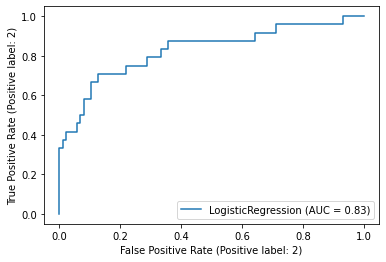

              precision    recall  f1-score   support

           1       0.84      1.00      0.91        87
           2       1.00      0.29      0.45        24

    accuracy                           0.85       111
   macro avg       0.92      0.65      0.68       111
weighted avg       0.87      0.85      0.81       111



In [77]:
machine_learning('final.csv','lr', 'normalize')

# To automatically optimize hyperparameters, add the number of compute cores you'd like to use for that process
# Note: this can take a while for some algorithms (svm in particular)

# Example below, this one is fairly quick
#machine_learning('final.csv','lr','standardize',23)
